In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
plays = pd.read_csv('data/plays.csv')
week1 = pd.read_csv('data/week1.csv')
week2 = pd.read_csv('data/week2.csv')
#week3 = pd.read_csv('data/week3.csv')

In [20]:
tracking = pd.concat([week1,week2])

In [21]:
tracking.shape

(2217815, 19)

In [22]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [23]:
tracking.columns

Index(['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId',
       'displayName', 'jerseyNumber', 'position', 'frameId', 'team', 'gameId',
       'playId', 'playDirection', 'route'],
      dtype='object')

In [24]:
julio_track = tracking[tracking['displayName']=='Julio Jones'].reset_index(drop=True)
julio_track.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
1,2018-09-07T01:07:14.700Z,91.37,44.17,0.03,0.03,0.02,290.45,29.61,None,2495454.0,Julio Jones,11.0,WR,2,away,2018090600,75,left,HITCH
2,2018-09-07T01:07:14.799Z,91.37,44.17,0.02,0.03,0.01,290.45,32.20,None,2495454.0,Julio Jones,11.0,WR,3,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.900Z,91.37,44.17,0.02,0.02,0.00,290.45,34.52,None,2495454.0,Julio Jones,11.0,WR,4,away,2018090600,75,left,HITCH
4,2018-09-07T01:07:15.000Z,91.37,44.16,0.02,0.02,0.01,290.45,38.72,None,2495454.0,Julio Jones,11.0,WR,5,away,2018090600,75,left,HITCH


In [25]:
julio_track['route'].value_counts()

GO        1075
HITCH      673
OUT        525
CORNER     514
POST       456
CROSS      363
IN         246
SLANT      105
FLAT        42
Name: route, dtype: int64

In [30]:
len(set(julio_track['playId']))

69

In [26]:
julio_track['gameId'].value_counts()

2018090600    2728
2018091600    1621
Name: gameId, dtype: int64

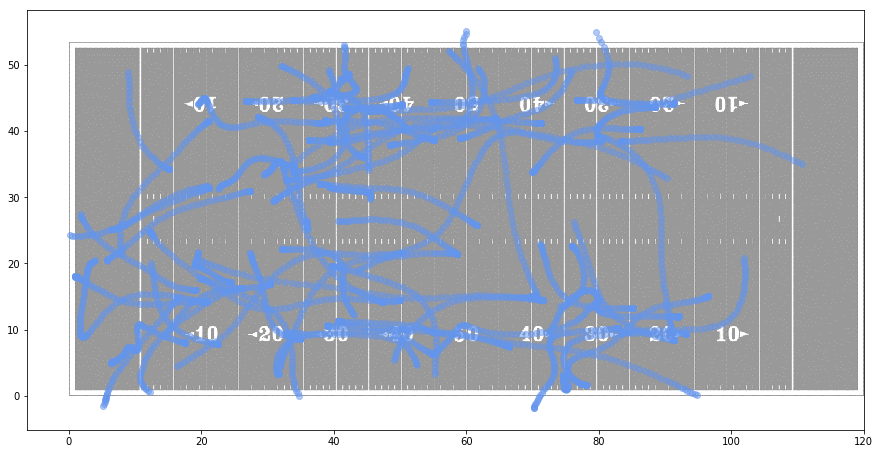

In [27]:
img = plt.imread('football_field_grayscale.png')

julio_fig, julio_ax = plt.subplots(figsize=(15,10))
julio_ax.imshow(img,extent=[0,120,0,53.34])

for x,y in zip(julio_track['x'],julio_track['y']):
    julio_ax.scatter(x,y,c='cornflowerblue',alpha=0.5)

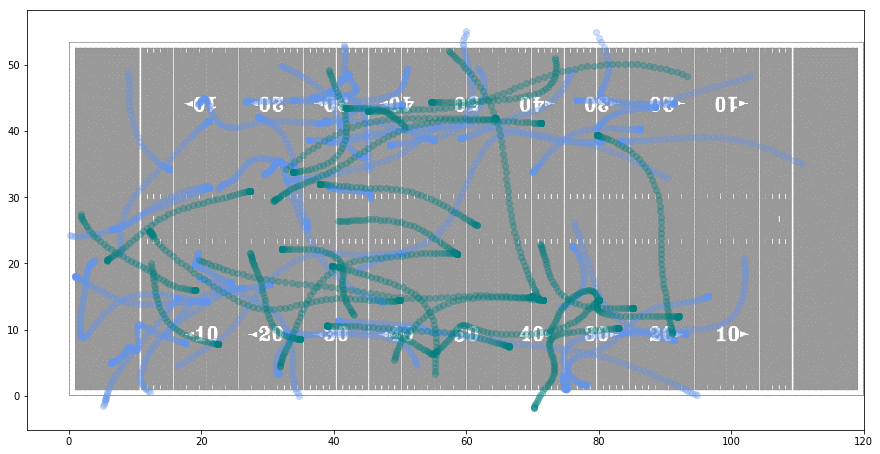

In [29]:
julio_fig, julio_ax = plt.subplots(figsize=(15,10))
julio_ax.imshow(img,extent=[0,120,0,53.34])
games = {2018090600:'cornflowerblue',2018092300:'darkorange',2018091600:'teal'}

for x,y,gid in zip(julio_track['x'],julio_track['y'],julio_track['gameId']):
    julio_ax.scatter(x,y,c=games[gid],alpha=0.3)

636
3844
2695
521
1546
267
4366
1423
2575
4239
402
2450
1940
656
1809
2717
1310
415
1568
545
4258
1698
2980
2207
168
2474
4395
4142
3506
3507
949
1205
312
3257
4282
1722
3004
1850
190
3392
1473
4417
1986
3138
4166
75
1869
1229
3279
3791
4306
4439
727
1751
2010
2650
4325
1894
3815
492
3181
632
4207
751
1262
4472
889
1402
1916


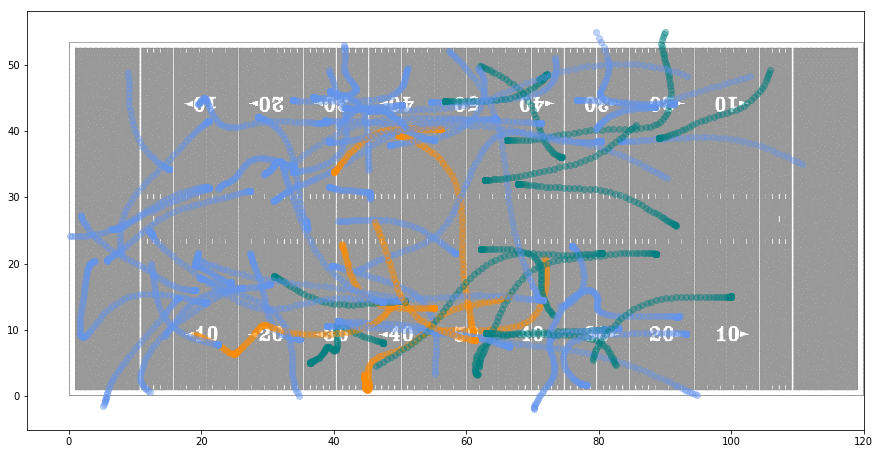

In [65]:
julio_fig, julio_ax = plt.subplots(figsize=(15,10))
julio_ax.imshow(img,extent=[0,120,0,53.34])

for play in set(julio_track['playId']):
    print(play)
    play_track = julio_track[julio_track['playId']==play]
    play_x = np.array([julio_track[julio_track['playId']==play]['x']])
    play_y = np.array([julio_track[julio_track['playId']==play]['y']])
    
    #print(play_x)
    
    if ((x>40).any() and ((x<80).any())):
        for x,y in zip(play_x,play_y):
            julio_ax.scatter(x,y,c='cornflowerblue',alpha=0.4)
    elif(play_x>80).any():
        for x,y in zip(play_x,play_y):
            julio_ax.scatter(x-30,y,c='darkorange',alpha=0.4)
    else:
        for x,y in zip(play_x,play_y):
            julio_ax.scatter(x+30,y,c='teal',alpha=0.4)

In [61]:
x = np.array([2,3,1,6,3,5])

((x>2).any() and ((x<4).any()))

True